# 2048 game

#### In this project we will compile python code and logic to design a 2048 game you have played very often in your smartphone.

---

## How to play 2048 :

1. **There is a 4*4 grid which can be filled with any number. Initially two random cells are filled with 2 in it. Rest cells are empty.**

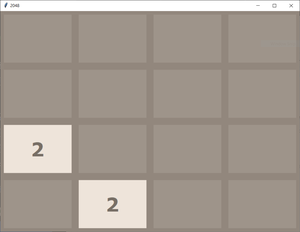

2. **We have to press any one of four keys to move up, down, left, or right. When we press any key, the elements of the cell move in that direction such that if any two identical numbers are contained in that particular row (in case of moving left or right) or column (in case of moving up and down) they get add up and extreme cell in that direction fill itself with that number and rest cells goes empty again.**

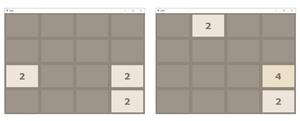

3. **After this grid compression any random empty cell gets itself filled with 2.**

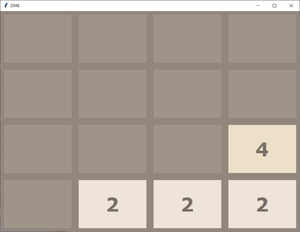

4. **Following the above process we have to double the elements by adding up and make 2048 in any of the cell. If we are able to do that we wins.**
5. **But if during the game there is no empty cell left to be filled with a new 2, then the game goes over.**

***EXAMPLE IF YOU WIN THE GAME*** $~~~~~~~~~~~~~~~~~~~~~$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ***EXAMPLE IF YOU LOSE THE GAME***\
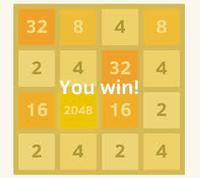 $~~~~~~~~~~~$ &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 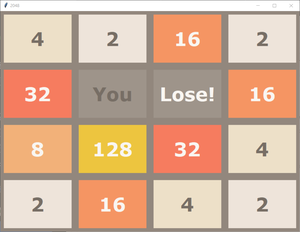

---

## Programming Aproach:

1. We will design each logic function such as we are performing a left swipe then we will use it for right swipe by reversing matrix and performing left swipe.
2. Moving up can be done by taking transpose then moving left.
3. Moving down can be done by taking transpose the moving right.
4. All the logic in the program are explained in detail in the comments. Highly recommended to go through all the comments.

---

## Intro

We have two python files below, one is 2048.py which contains main driver code and the other is logic.py which contains all functions used. logic.py should be imported in 2048.py to use these functions. just place both the files in the same folder then run 2048.py will work perfectly.

---

## Start building the game

*Start with the two files*

### 1. logic.py

In [ ]:
# logic.py to be imported in the 2048.py file

# importing random package for methods to generate random numbers.
import random

# function to initialize game / grid at the start
def start_game():

	# declaring an empty list then appending 4 list each with four elements as 0.
	mat =[]
	for i in range(4):
		mat.append([0] * 4)

	# printing controls for user
	print("Commands are as follows : ")
	print("'W' or 'w' : Move Up")
	print("'S' or 's' : Move Down")
	print("'A' or 'a' : Move Left")
	print("'D' or 'd' : Move Right")

	# calling the function to add a new 2 in grid after every step
	add_new_2(mat)
	return mat

# function to add a new 2 in grid at any random empty cell
def add_new_2(mat):

# choosing a random index for row and column.
	r = random.randint(0, 3)
	c = random.randint(0, 3)

	# while loop will break as the random cell chosen will be empty (or contains zero)
	while(mat[r] != 0):
		r = random.randint(0, 3)
		c = random.randint(0, 3)

	# we will place a 2 at that empty random cell.
	mat[r] = 2

# function to get the current state of game
def get_current_state(mat):

	# if any cell contains 2048 we have won
	for i in range(4):
		for j in range(4):
			if(mat[i][j]== 2048):
				return 'WON'

	# if we are still left with atleast one empty cell game is not yet over
	for i in range(4):
		for j in range(4):
			if(mat[i][j]== 0):
				return 'GAME NOT OVER'

	# or if no cell is empty now but if after any move left, right, up or down, if any two cells gets merged and create an empty cell then also game is not yet over
	for i in range(3):
		for j in range(3):
			if(mat[i][j]== mat[i + 1][j] or mat[i][j]== mat[i][j + 1]):
				return 'GAME NOT OVER'

	for j in range(3):
		if(mat[3][j]== mat[3][j + 1]):
			return 'GAME NOT OVER'

	for i in range(3):
		if(mat[i][3]== mat[i + 1][3]):
			return 'GAME NOT OVER'

	# else we have lost the game
	return 'LOST'

# all the functions defined below are for left swap initially.

# function to compress the grid after every step before and after merging cells.
def compress(mat):

	# bool variable to determine any change happened or not
	changed = False

	# empty grid 
	new_mat = []

	# with all cells empty
	for i in range(4):
		new_mat.append([0] * 4)
		
	# here we will shift entries of each cell to it's extreme left, row by row
	# loop to traverse rows
	for i in range(4):
		pos = 0

		# loop to traverse each column in respective row
		for j in range(4):
			if(mat[i][j] != 0):
				
				# if cell is non empty then we will shift it's number to previous empty cell in that row denoted by pos variable
				new_mat[i][pos] = mat[i][j]
				
				if(j != pos):
					changed = True
				pos += 1

	# returning new compressed matrix and the flag variable.
	return new_mat, changed

# function to merge the cells in matrix after compressing
def merge(mat):
	
	changed = False
	
	for i in range(4):
		for j in range(3):

			# if current cell has same value as next cell in the row and they are non empty then
			if(mat[i][j] == mat[i][j + 1] and mat[i][j] != 0):

				# double current cell value and empty the next cell
				mat[i][j] = mat[i][j] * 2
				mat[i][j + 1] = 0

				# make bool variable True indicating the new grid after merging is different.
				changed = True

	return mat, changed

# function to reverse the matrix means reversing the content of each row (reversing the sequence)
def reverse(mat):
	new_mat =[]
	for i in range(4):
		new_mat.append([])
		for j in range(4):
			new_mat[i].append(mat[i][3 - j])
	return new_mat

# function to get the transpose of matrix means interchanging rows and column
def transpose(mat):
	new_mat = []
	for i in range(4):
		new_mat.append([])
		for j in range(4):
			new_mat[i].append(mat[j][i])
	return new_mat

# function to update the matrix if we move / swipe left
def move_left(grid):

	# first compress the grid
	new_grid, changed1 = compress(grid)

	# then merge the cells.
	new_grid, changed2 = merge(new_grid)
	
	changed = changed1 or changed2

	# again compress after merging.
	new_grid, temp = compress(new_grid)

	# return new matrix and bool changed telling whether the grid is same or different
	return new_grid, changed

# function to update the matrix if we move / swipe right
def move_right(grid):

	# to move right we just reverse the matrix 
	new_grid = reverse(grid)

	# then move left
	new_grid, changed = move_left(new_grid)

	# then again reverse matrix will give us desired result
	new_grid = reverse(new_grid)
	return new_grid, changed

# function to update the matrix if we move / swipe up
def move_up(grid):

	# to move up we just take transpose of matrix
	new_grid = transpose(grid)

	# then move left (calling all included functions) then
	new_grid, changed = move_left(new_grid)

	# again take transpose will give desired results
	new_grid = transpose(new_grid)
	return new_grid, changed

# function to update the matrix if we move / swipe down
def move_down(grid):

	# to move down we take transpose
	new_grid = transpose(grid)

	# move right and then again
	new_grid, changed = move_right(new_grid)

	# take transpose will give desired results.
	new_grid = transpose(new_grid)
	return new_grid, changed

# this file only contains all the logic functions to be called in main function present in the other file


### 2. 2048.py

In [ ]:
# 2048.py

# importing the logic.py file where we have written all the logic functions used.
import logic

# Driver code
if __name__ == '__main__':
	
# calling start_game function to initialize the matrix
	mat = logic.start_game()

while(True):

	# taking the user input for next step
	x = input("Press the command : ")

	# we have to move up
	if(x == 'W' or x == 'w'):

		# call the move_up function
		mat, flag = logic.move_up(mat)

		# get the current state and print it
		status = logic.get_current_state(mat)
		print(status)

		# if game not over then continue and add a new two
		if(status == 'GAME NOT OVER'):
			logic.add_new_2(mat)

		# else break the loop 
		else:
			break

	# the above process will be followed in case of each type of move below

	# to move down
	elif(x == 'S' or x == 's'):
		mat, flag = logic.move_down(mat)
		status = logic.get_current_state(mat)
		print(status)
		if(status == 'GAME NOT OVER'):
			logic.add_new_2(mat)
		else:
			break

	# to move left
	elif(x == 'A' or x == 'a'):
		mat, flag = logic.move_left(mat)
		status = logic.get_current_state(mat)
		print(status)
		if(status == 'GAME NOT OVER'):
			logic.add_new_2(mat)
		else:
			break

	# to move right
	elif(x == 'D' or x == 'd'):
		mat, flag = logic.move_right(mat)
		status = logic.get_current_state(mat)
		print(status)
		if(status == 'GAME NOT OVER'):
			logic.add_new_2(mat)
		else:
			break
	else:
		print("Invalid Key Pressed")

	# print the matrix after each move.
	print(mat)
